# Задание 1. Описательные статистики

## Задача

Прежде, чем применять методы дисперсионного анализа или строить регрессионные модели, необходимо познакомиться с исходными данными для того, чтобы выбрать наиболее подходящий метод.

Проведите описательный анализ исходных данных http://lib.stat.cmu.edu/DASL/Datafiles/Colleges.html

(немного слов о самой задаче http://lib.stat.cmu.edu/DASL/Stories/ComparingColleges.html)

Подсчет и визуализация описательных статистик, поиск и отсечение выбросов, решение проблемы с пропусками, взаимная корреляция.

## Решение

Подключим необходимые библиотеки.

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling

from pandas.plotting import scatter_matrix

Исходные данные были сохранены в формате .csv. Загрузим эти данные и посмотрим на них.

In [176]:
df = pd.read_csv('task1_colleges.csv', sep='\t')
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [21]:
print(df.shape)
print(df.dtypes)

(50, 8)
School         object
School_Type    object
SAT             int64
Acceptance      int64
$/Student       int64
Top 10%         int64
%PhD            int64
Grad%           int64
dtype: object


Данные описываются 8 переменными, количество данных равно 50. Имеется два категориальных признака, остальные - числовые. Если посмотреть на данные целиком, то станет ясно, что пропусков в них нет.

Посмотрим на значения некоторых основных статистик по нашим данным.

In [22]:
df.describe(include='all')

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,50,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Hamilton,Lib Arts,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,25,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,NaN,NaN,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,NaN,NaN,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,NaN,NaN,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,NaN,NaN,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,NaN,NaN,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000


Вычислим также коэффициенты асимметрии и эксцесса.

In [144]:
print
print('skewness:')
print('SAT:', df['SAT'].skew(), 'Acceptance:', df['Acceptance'].skew(), '$/Student:', df['$/Student'].skew(),
      'Top 10%:', df['Top 10%'].skew(), '%PhD:', df['%PhD'].skew(), 'Grad%:', df['Grad%'].skew())
print('kurtosis:')
print('SAT:', df['SAT'].kurt(), 'Acceptance:', df['Acceptance'].kurt(), '$/Student:', df['$/Student'].kurt(),
      'Top 10%:', df['Top 10%'].kurt(), '%PhD:', df['%PhD'].kurt(), 'Grad%:', df['Grad%'].kurt())

skewness:
SAT: -0.16427835471447538 Acceptance: 0.3904075719306927 $/Student: 2.5679368975708283 Top 10%: -0.2493031440827578 %PhD: -1.4919976077212176 Grad%: -0.7714857223288459
kurtosis:
SAT: -0.11362944271553266 Acceptance: -0.8026029863562223 $/Student: 9.228787427591854 Top 10%: -0.7651677569429456 %PhD: 3.4842594469003085 Grad%: 0.16802034597960924


Можно сделать несколько выводов: 
* каждое учебное заведение встречается в списке ровно один раз (что логично)
* университетов и школ искусств в имеющейся таблице поровну
* распределения ''\$/Student'' и ''%PhD'' довольно сильно скошены
* судя по различиям в значениях среднего и медианы, в некоторых данных (''\$/Student'', ''%PhD'') могут иметься выбросы.

Если посмотреть на максимальное значение ''\$/Student'', а также на минимальное значения в ''%PhD'', то можно заметить, что они отклоняются от соответствущих квартилей довольно сильно (сильнее, чем на $1.5*IQR$).

Действительно, $102262 > 36803.75 + 1.5 * (36803.75 - 20182.25) = 61736$ для ''\$/Student'' и $58 < 86.25 - 1.5 * (97.75 - 86.25) = 69$ для ''%PhD''.
Скорее всего, эти значения являются выбросами.

Что касается остальных признаков, то можно предположить, что выбросов там нет.

Однако лучше построить гистограммы имеющихся количественных признаков и боксплоты, чтобы изучить их более внимательно.

In [93]:
%matplotlib inline

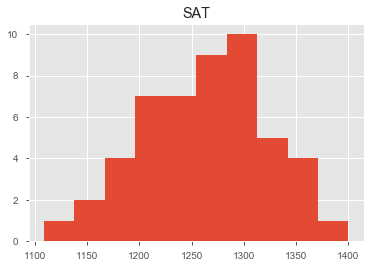

In [111]:
df['SAT'].hist()
plt.title('SAT')

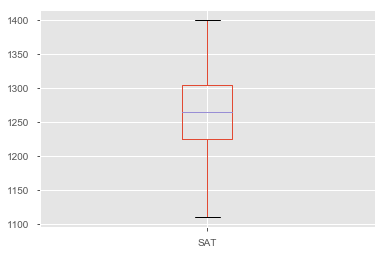

In [151]:
df.boxplot(column=['SAT'])

Распределение 'SAT' очень похоже на нормальное, выбросов нет.

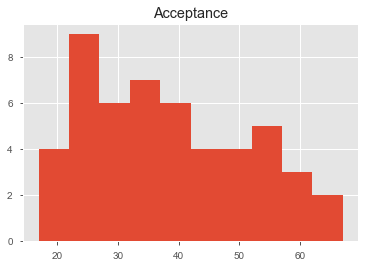

In [150]:
df['Acceptance'].hist()
plt.title('Acceptance')

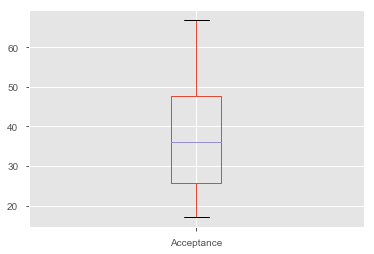

In [152]:
df.boxplot(column=['Acceptance'])

Распределение 'Acceptance' уже менее похоже на нормальное, чем предыдущее, однако выбросов там тоже нет.

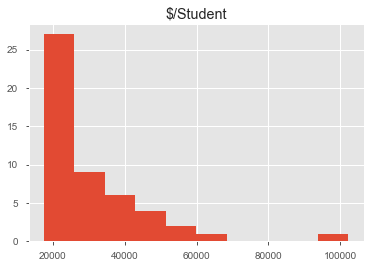

In [130]:
df['$/Student'].hist()
plt.title('$/Student')

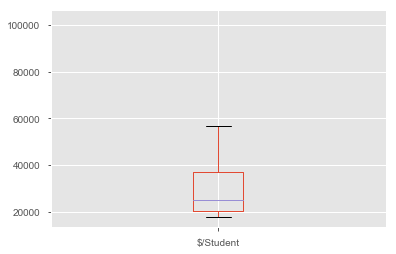

In [154]:
df.boxplot(column=['$/Student'])

Распределение признака '$/Student' сильно скошено влево и напоминает экспоненциальное.

Причем гистограмма подтверждает предположение о наличии в данных выброса (который почему-то не отобразился на боксплоте явной точкой, однако границы, в которых строится боксплот, включают максимальное значение признака, т.е. выброс (102262)).

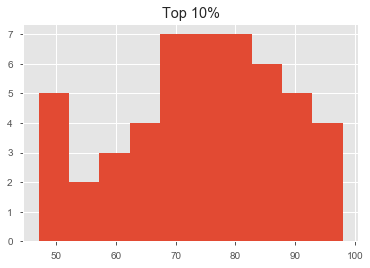

In [136]:
df['Top 10%'].hist()
plt.title('Top 10%')

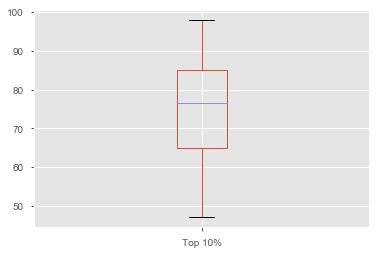

In [155]:
df.boxplot(column=['Top 10%'])

Приведенные выше данные для 'Top 10%' не содержат выбросов.

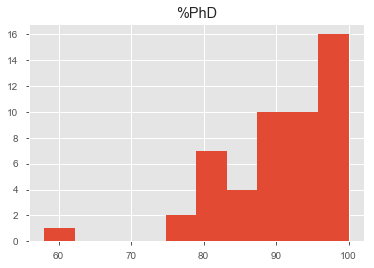

In [145]:
df['%PhD'].hist()
plt.title('%PhD')

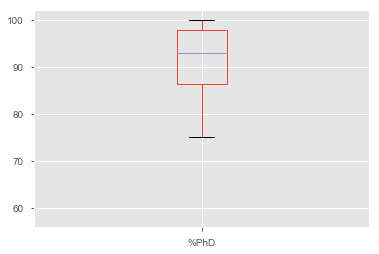

In [156]:
df.boxplot(column=['%PhD'])

Судя по гистограмме, в '%PhD' минимальный элемент является выбросом, как и было сказано ранее.

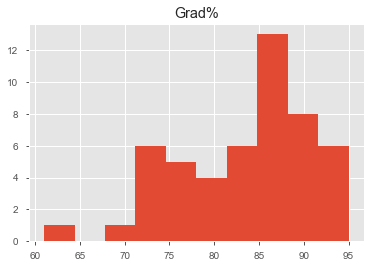

In [146]:
df['Grad%'].hist()
plt.title('Grad%')

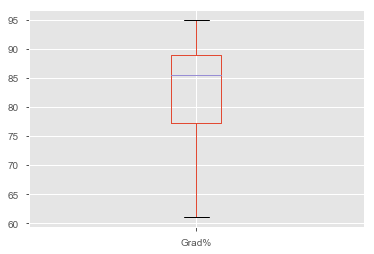

In [157]:
df.boxplot(column=['Grad%'])

Здесь видно, что минимальный элемент похож на выброс, однако он отклоняется от первого квартиля меньше, чем на полтора интерквартильных размаха. Действительно, $61 > 77.25 - 1.5 * (89 - 77.25) = 59.625$. Этот элемент является скорее пограничным, чем явным выбросом (имеется не так много данных, чтобы говорить тут с уверенностью), но на всякий случай его тоже можно отбросить.

Теперь избавимся от выбросов (максимальное значение в '$/Student' и по одному минимальному значению из 'Grad%' и '%Phd'). Для этого удалим строки, содержащие значения с выбросами, из данных. Найдем, какие строки нам нужно удалить.

In [179]:
print(df[(df['$/Student'] == max(df['$/Student'])) |
           (df['Grad%'] == min(df['Grad%'])) |
           (df['%PhD'] == min(df['%PhD']))].index)

Int64Index([29, 39, 41], dtype='int64')


Это строки  с номерами 29, 39, 41 (если нумерация с нуля). Удалим их.

In [180]:
df_without_outliers = df.drop(df[(df['$/Student'] == max(df['$/Student'])) |
           (df['Grad%'] == min(df['Grad%'])) |
           (df['%PhD'] == min(df['%PhD']))].index)

df_without_outliers

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86
5,Pomona,Lib Arts,1320,33,26668,79,98,80
6,Wesleyan (CT),Lib Arts,1290,35,19948,73,87,91
7,Middlebury,Lib Arts,1255,25,24718,65,89,92
8,Smith,Lib Arts,1195,57,25271,65,90,87
9,Davidson,Lib Arts,1230,36,17721,77,94,89


Видно, что в полученных данных уже отсутствуют строчки с индексами 29, 39, 41, значит, выбросы удалены. Построим снова гистограммы и боксплоты для "$/Student", "%Phd", "Grad%" (для остальных признаков ничего сильно не поменяется):

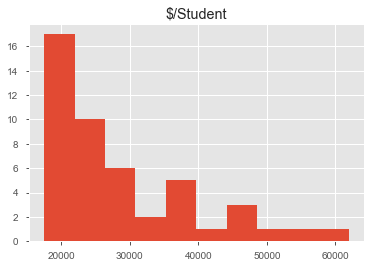

In [182]:
df_without_outliers['$/Student'].hist()
plt.title('$/Student')

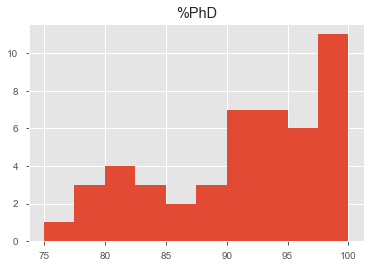

In [183]:
df_without_outliers['%PhD'].hist()
plt.title('%PhD')

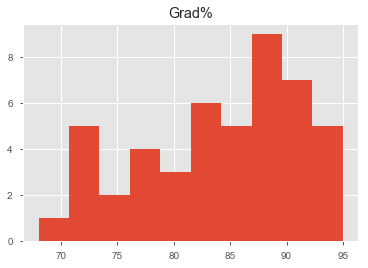

In [181]:
df_without_outliers['Grad%'].hist()
plt.title('Grad%')

В данных больше нет выбросов, мы победили!

Построим теперь матрицу корреляций, чтобы посмотреть на взаимосвязь между признаками:

In [184]:
df.corr()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
SAT,1.000000,-0.606753,0.579423,0.509260,0.220944,0.569126
Acceptance,-0.606753,1.000000,-0.288819,-0.616328,-0.311665,-0.562211
$/Student,0.579423,-0.288819,1.000000,0.509948,0.286665,0.051055
Top 10%,0.509260,-0.616328,0.509948,1.000000,0.448616,0.161335
%PhD,0.220944,-0.311665,0.286665,0.448616,1.000000,-0.055403
Grad%,0.569126,-0.562211,0.051055,0.161335,-0.055403,1.000000


Попробуем объяснить полученные результаты.

* SAT дает довольно заметные по абсолютному значению коэффициенты корреляции почти со всеми признаками (кроме %PhD, который не коррелирует ни с чем). Причем корреляция с Acceptance отрицательна. Возможно, это связано с тем, что принятие в учебное заведение студентов происходит в результате отбора. Соответственно, чем строже был отбор, т.е. чем более сильных студентов туда набрали, тем их, естественно, набрали меньше, но тем лучшие результаты они показали в результате экзаменов. Видимо, аналогично можно объяснить, почему Acceptance дает отрицательную корреляцию со всеми остальными признаками.
* Довольно заметная положительная корреляция "SAT" и "$/Student" может объясняться выплатой стипендий студентам, показывающим хорошие результаты. Соответственно, чем больше хороших студентов, тем больше на них тратится денег.
* Также кажется вполне логичным, что "SAT" дает заметную положительную корреляцию с "Top 10%" и "Grad%". Потому что это все в некотором смысле показатели того, насколько студенты был "хорошими" в учебном заведении. Однако вот "Top 10%" и "Grad%" не являются сильно коррелированными между собой, и это тоже кажется логичным, ведь университет заканчивают далеко не только студенты из высоких позиций рейтинга.